# Loan Prediction


# Problem Statment
A Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. 
These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, 
they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. 
Here they have provided a data set.

Data
- Variable Descriptions:


| Variable          	| Description                                    	|
|-------------------	|------------------------------------------------	|
| Loan_ID           	| Unique Loan ID                                 	|
| Gender            	| Male/ Female                                   	|
| Married           	| Applicant married (Y/N)                        	|
| Dependents        	| Number of dependents                           	|
| Education         	| Applicant Education (Graduate/ Under Graduate) 	|
| Self_Employed     	| Self employed (Y/N)                            	|
| ApplicantIncome   	| Applicant income                               	|
| CoapplicantIncome 	| Coapplicant income                             	|
| LoanAmount        	| Loan amount in thousands                       	|
| Loan_Amount_Term  	| Term of loan in months                         	|
| Credit_History    	| credit history meets guidelines                	|
| Property_Area     	| Urban/ Semi Urban/ Rural                       	|
| Loan_Status       	| Loan approved (Y/N)                            	|


In [1]:
## Importing Library
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
# Reading the training dataset in a dataframe using Pandas
df = pd.read_csv("train.csv")


In [3]:
df.shape


(614, 13)

In [4]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [6]:
#Check the Information about  train Data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# Reading the test dataset in a dataframe using Pandas
test = pd.read_csv("test.csv")

In [8]:
test.head(10)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [9]:
test.shape

(367, 12)

In [10]:
#Check the Information about  train Data set
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [11]:
#Combining both train and test dataset

fullData = pd.concat([df,test],axis=0, sort=True)


In [12]:
fullData.head # Checking data according To row

<bound method NDFrame.head of      ApplicantIncome  CoapplicantIncome  Credit_History Dependents  \
0               5849                0.0             1.0          0   
1               4583             1508.0             1.0          1   
2               3000                0.0             1.0          0   
3               2583             2358.0             1.0          0   
4               6000                0.0             1.0          0   
..               ...                ...             ...        ...   
362             4009             1777.0             1.0         3+   
363             4158              709.0             1.0          0   
364             3250             1993.0             NaN          0   
365             5000             2393.0             1.0          0   
366             9200                0.0             1.0          0   

        Education Gender  LoanAmount  Loan_Amount_Term   Loan_ID Loan_Status  \
0        Graduate   Male         NaN             

In [13]:
#Check the Information about  Data set
fullData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    981 non-null    int64  
 1   CoapplicantIncome  981 non-null    float64
 2   Credit_History     902 non-null    float64
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Gender             957 non-null    object 
 6   LoanAmount         954 non-null    float64
 7   Loan_Amount_Term   961 non-null    float64
 8   Loan_ID            981 non-null    object 
 9   Loan_Status        614 non-null    object 
 10  Married            978 non-null    object 
 11  Property_Area      981 non-null    object 
 12  Self_Employed      926 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [14]:
fullData.shape

(981, 13)

In [15]:
# Check Unique value in Target Varibale
fullData['Loan_Status'].unique()

array(['Y', 'N', nan], dtype=object)

In [16]:
#Look at the available missing values in the dataset
fullData.isnull().sum()


ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
dtype: int64

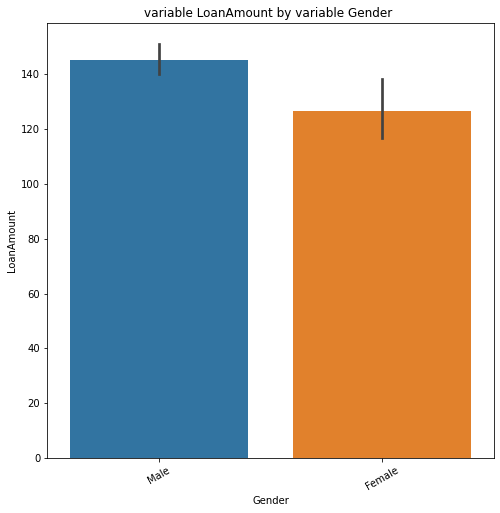

In [17]:
#plot Bar graph acc to variable LoanAmount by variable Gender 
plt.figure(figsize=(8,8))
sns.barplot(x='Gender',y='LoanAmount',data=fullData)
plt.xticks(rotation=30)
plt.title('variable LoanAmount by variable Gender ')
plt.show()

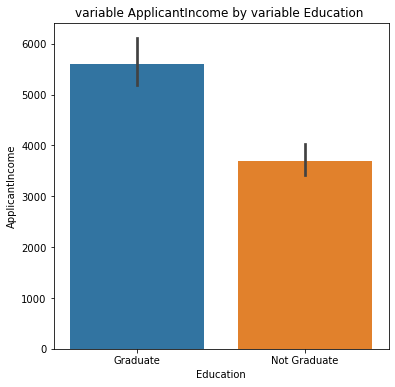

In [18]:
#plot Bar graph acc to variable LoanAmount by variable Education 
plt.figure(figsize=(6,6))
sns.barplot(x='Education',y='ApplicantIncome',data=fullData)
plt.xticks(rotation=0)
plt.title('variable ApplicantIncome by variable Education ')
plt.show()

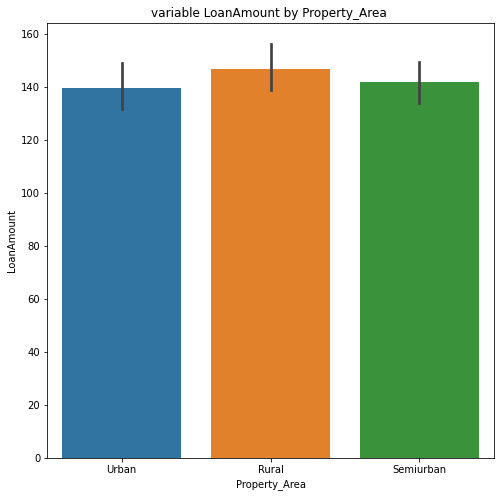

In [19]:
#plot Bar graph acc to variable LoanAmount by Property_Area 
plt.figure(figsize=(8,8))
sns.barplot(x='Property_Area',y='LoanAmount',data=fullData)
plt.xticks(rotation=0)
plt.title('variable LoanAmount by Property_Area ')
plt.show()

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

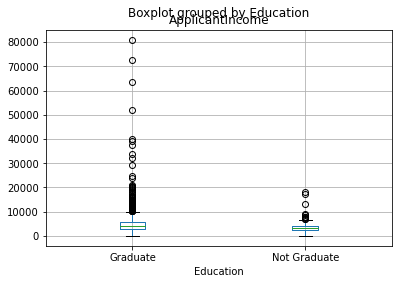

In [20]:
# Box Plot for variable ApplicantIncome by variable Education of training data set

fullData.boxplot(column='ApplicantIncome', by = 'Education')

We can see that there is no substantial different between the mean income of graduate and non-graduates.
But there are a higher number of graduates with very high incomes, which are appearing to be the outliers

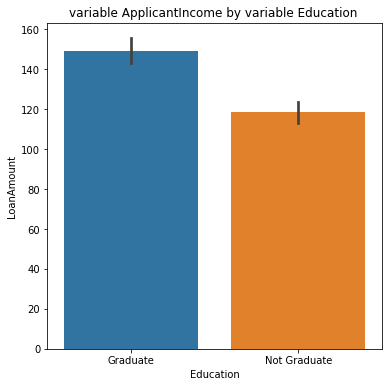

In [21]:
plt.figure(figsize=(6,6))
sns.barplot(x='Education',y='LoanAmount',data=fullData)
plt.xticks(rotation=0)
plt.title('variable ApplicantIncome by variable Education ')
plt.show()

In [22]:
# check Mode
fullData['Loan_Status'].mode()

0    Y
dtype: object

In [23]:
# check Unique 
fullData['Loan_Status'].unique()

array(['Y', 'N', nan], dtype=object)

In [24]:
# Fill NAN value According To Mode
fullData['Loan_Status'].fillna(fullData['Loan_Status'].mode()[0],inplace=True)

In [25]:
# Values Counts
fullData['Loan_Status'].value_counts()


Y    789
N    192
Name: Loan_Status, dtype: int64

In [26]:
# Values Counts
fullData['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

<AxesSubplot:>

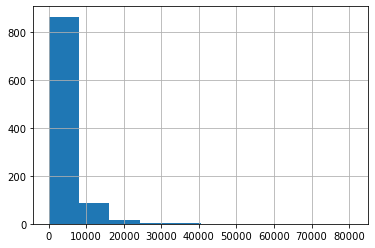

In [27]:
# Histogram of variable ApplicantIncome

fullData['ApplicantIncome'].hist()

<AxesSubplot:>

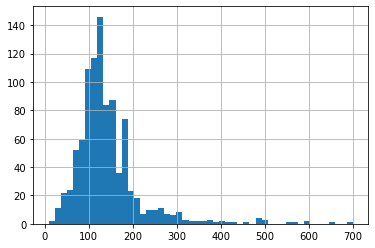

In [28]:
# Histogram of variable LoanAmount

fullData['LoanAmount'].hist(bins=50)

In [29]:
# Add both ApplicantIncome and CoapplicantIncome to TotalIncome
fullData['TotalIncome'] = fullData['ApplicantIncome'] + fullData['CoapplicantIncome']


<AxesSubplot:>

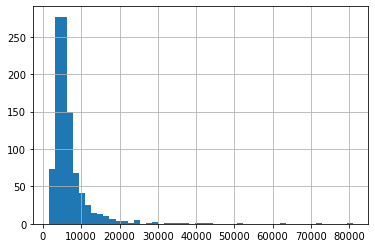

In [30]:
# Histogram of variable LoanAmount

fullData['TotalIncome'].hist(bins=50)

In [31]:
#check Credit history=1 then check values count
fullData['Loan_Status'][df['Credit_History']==1 ].value_counts()

Y    669
N     97
Name: Loan_Status, dtype: int64

669 number of loans were approved.

In [32]:
#check Credit history =1 and Loan stats=yes then check % values in approal loan status
print('Percentage of Loan Status according to Credit:', fullData['Loan_Status'][fullData['Credit_History']== 1].value_counts(normalize = True)[0]*100)


Percentage of Loan Status according to Credit: 87.13527851458885


87.13527851458885 % of the applicants whose loans were approved have Credit_History equals to 1

In [33]:
#Imputing Missing values with mode for categorical variables

fullData['Married'].fillna(fullData['Married'].mode()[0], inplace=True)
fullData['Dependents'].fillna(fullData['Dependents'].mode()[0], inplace=True)
fullData['Loan_Amount_Term'].fillna(fullData['Loan_Amount_Term'].mode()[0], inplace=True)
fullData['Credit_History'].fillna(fullData['Credit_History'].mode()[0], inplace=True)

In [34]:
fullData['Gender'].mode()

0    Male
dtype: object

In [35]:
fullData['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [36]:
#fill values according to Gender Mode
fullData['Gender'].fillna(fullData['Gender'].mode()[0], inplace=True)

In [37]:
#Percentage of Loan Status according to Male & Female
print('Percentage of Loan Status according to Male:', fullData['Loan_Status'][fullData['Gender']== 'Male'].value_counts(normalize = True)[0]*100)
print('Percentage of Loan Status according to Female', fullData['Loan_Status'][fullData['Gender']== 'Female'].value_counts(normalize = True)[0]*100)

Percentage of Loan Status according to Male: 80.60075093867334
Percentage of Loan Status according to Female 79.67032967032966


In [38]:
# Percentage of Loan Status according to Graduate &  Not Graduate
print('Percentage of Loan Status according to Graduate:', fullData['Loan_Status'][fullData['Education']== 'Graduate'].value_counts(normalize = True)[0]*100)
print('Percentage of Loan Status according to Not Graduate', fullData['Loan_Status'][fullData['Education']== 'Not Graduate'].value_counts(normalize = True)[0]*100)

Percentage of Loan Status according to Graduate: 81.65137614678899
Percentage of Loan Status according to Not Graduate 76.14678899082568


In [39]:
fullData['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [40]:
#Percentage of Loan Status according to 'Property_Area'
print('Percentage of loan Status whom property Urban:', fullData['Loan_Status'][fullData['Property_Area']== 'Urban'].value_counts(normalize = True)[0]*100)

print('Percentage of loan Status whom property Rural:', fullData['Loan_Status'][fullData['Property_Area']== 'Rural'].value_counts(normalize = True)[0]*100)

print('Percentage of loan Status whom property Semiurban:', fullData['Loan_Status'][fullData['Property_Area']== 'Semiurban'].value_counts(normalize = True)[0]*100)



Percentage of loan Status whom property Urban: 79.82456140350878
Percentage of loan Status whom property Rural: 76.20689655172413
Percentage of loan Status whom property Semiurban: 84.5272206303725


In [41]:
fullData.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
Credit_History        0
Dependents            0
Education             0
Gender                0
LoanAmount           27
Loan_Amount_Term      0
Loan_ID               0
Loan_Status           0
Married               0
Property_Area         0
Self_Employed        55
TotalIncome           0
dtype: int64

In [42]:
#Imputing Missing values with mean for continuous variable
fullData['LoanAmount'].fillna(fullData['LoanAmount'].mean(), inplace=True)

fullData['Loan_Amount_Term'].fillna(fullData['Loan_Amount_Term'].mean(), inplace=True)
fullData['ApplicantIncome'].fillna(fullData['ApplicantIncome'].mean(), inplace=True)
fullData['CoapplicantIncome'].fillna(fullData['CoapplicantIncome'].mean(), inplace=True)

In [43]:
#Imputing Missing values with mode for categorical variables
fullData['Gender'].fillna(fullData['Gender'].mode()[0], inplace=True)
fullData['Married'].fillna(fullData['Married'].mode()[0], inplace=True)
fullData['Dependents'].fillna(fullData['Dependents'].mode()[0], inplace=True)
fullData['Loan_Amount_Term'].fillna(fullData['Loan_Amount_Term'].mode()[0], inplace=True)
fullData['Credit_History'].fillna(fullData['Credit_History'].mode()[0], inplace=True)
fullData['Self_Employed'].fillna(fullData['Self_Employed'].mode()[0], inplace=True)


In [44]:
#Check the  null value
fullData.isnull().sum()


ApplicantIncome      0
CoapplicantIncome    0
Credit_History       0
Dependents           0
Education            0
Gender               0
LoanAmount           0
Loan_Amount_Term     0
Loan_ID              0
Loan_Status          0
Married              0
Property_Area        0
Self_Employed        0
TotalIncome          0
dtype: int64

In [45]:
fullData.head(10)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,TotalIncome
0,5849,0.0,1.0,0,Graduate,Male,142.51153,360.0,LP001002,Y,No,Urban,No,5849.0
1,4583,1508.0,1.0,1,Graduate,Male,128.00000,360.0,LP001003,N,Yes,Rural,No,6091.0
2,3000,0.0,1.0,0,Graduate,Male,66.00000,360.0,LP001005,Y,Yes,Urban,Yes,3000.0
3,2583,2358.0,1.0,0,Not Graduate,Male,120.00000,360.0,LP001006,Y,Yes,Urban,No,4941.0
4,6000,0.0,1.0,0,Graduate,Male,141.00000,360.0,LP001008,Y,No,Urban,No,6000.0
5,5417,4196.0,1.0,2,Graduate,Male,267.00000,360.0,LP001011,Y,Yes,Urban,Yes,9613.0
6,2333,1516.0,1.0,0,Not Graduate,Male,95.00000,360.0,LP001013,Y,Yes,Urban,No,3849.0
7,3036,2504.0,0.0,3+,Graduate,Male,158.00000,360.0,LP001014,N,Yes,Semiurban,No,5540.0
8,4006,1526.0,1.0,2,Graduate,Male,168.00000,360.0,LP001018,Y,Yes,Urban,No,5532.0
9,12841,10968.0,1.0,1,Graduate,Male,349.00000,360.0,LP001020,N,Yes,Semiurban,No,23809.0


In [46]:
# Convert all non-numeric values to number
cat=['Gender','Married','Dependents','Education','Credit_History','Self_Employed','Property_Area','Loan_Status']


In [47]:
# non-numeric values to number like(0,1)
for var in cat:
    le = preprocessing.LabelEncoder()
    fullData[var]=le.fit_transform(fullData[var].astype('str'))
fullData.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
Credit_History         int32
Dependents             int32
Education              int32
Gender                 int32
LoanAmount           float64
Loan_Amount_Term     float64
Loan_ID               object
Loan_Status            int32
Married                int32
Property_Area          int32
Self_Employed          int32
TotalIncome          float64
dtype: object

In [48]:
fullData.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,TotalIncome
0,5849,0.0,1,0,0,1,142.51153,360.0,LP001002,1,0,2,0,5849.0
1,4583,1508.0,1,1,0,1,128.00000,360.0,LP001003,0,1,0,0,6091.0
2,3000,0.0,1,0,0,1,66.00000,360.0,LP001005,1,1,2,1,3000.0
3,2583,2358.0,1,0,1,1,120.00000,360.0,LP001006,1,1,2,0,4941.0
4,6000,0.0,1,0,0,1,141.00000,360.0,LP001008,1,0,2,0,6000.0


In [49]:
#describe the data set check column static values
fullData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,981.0,5179.795107,5695.104533,0.0,2875.0,3800.0,5516.0,81000.0
CoapplicantIncome,981.0,1601.916330,2718.772806,0.0,0.0,1110.0,2365.0,41667.0
Credit_History,981.0,0.849134,0.358101,0.0,1.0,1.0,1.0,1.0
Dependents,981.0,0.767584,1.030657,0.0,0.0,0.0,2.0,3.0
Education,981.0,0.222222,0.415952,0.0,0.0,0.0,0.0,1.0
Gender,981.0,0.814475,0.388921,0.0,1.0,1.0,1.0,1.0
LoanAmount,981.0,142.511530,76.347770,9.0,101.0,128.0,160.0,700.0
Loan_Amount_Term,981.0,342.564730,64.482011,6.0,360.0,360.0,360.0,480.0
Loan_Status,981.0,0.804281,0.396955,0.0,1.0,1.0,1.0,1.0
Married,981.0,0.646279,0.478368,0.0,0.0,1.0,1.0,1.0


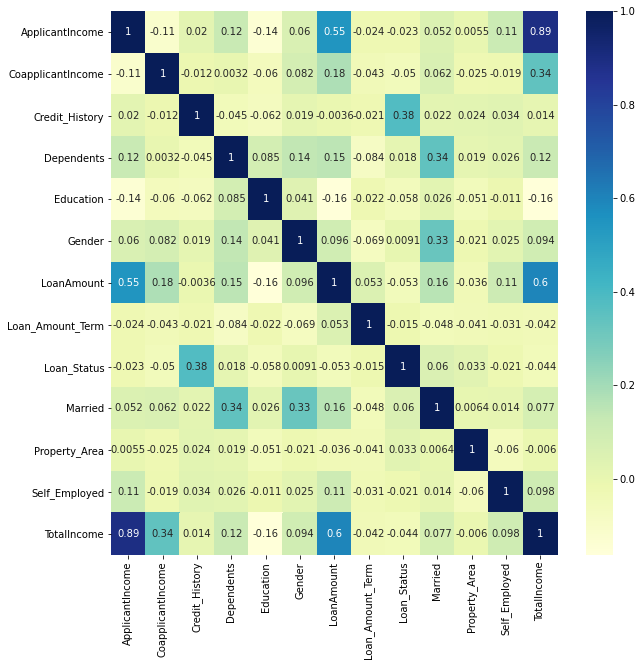

In [50]:
# corr with data set
plt.subplots(figsize=(10, 10))
sns.heatmap(fullData.corr(), annot = True, cmap="YlGnBu")
plt.show()

then we Observe that Maximun corr with credit history then our target variable is "Loan status "then fit the model

In [51]:
# import Logistic regtression model and Fit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [52]:
X_train, X_test, y_train, y_test = train_test_split(fullData.drop(['Loan_Status','Loan_ID'], axis = 1),
                                                    fullData['Loan_Status'],
                                                    test_size=0.30, 
                                                    random_state=8)

In [53]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
#Check  prediction model
prediction = logmodel.predict(X_test)
X_test.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Married,Property_Area,Self_Employed,TotalIncome
379,5391,0.0,1,2,0,1,130.0,360.0,1,2,0,5391.0
193,3858,0.0,1,0,0,1,76.0,360.0,0,1,0,3858.0
168,1750,2935.0,0,3,0,0,94.0,360.0,1,1,0,4685.0
302,5000,0.0,1,0,0,0,132.0,360.0,0,0,0,5000.0
72,4083,1775.0,1,1,0,1,139.0,60.0,1,2,0,5858.0


In [61]:
X_test.shape

(295, 12)

In [55]:
# accuracy Of model
accuracy = logmodel.score(X_test, y_test)
print(accuracy*100, '%')


81.01694915254237 %


In [56]:
#check Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[ 12,  40],
       [ 16, 227]], dtype=int64)

In [57]:
#classsification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.43      0.23      0.30        52
           1       0.85      0.93      0.89       243

    accuracy                           0.81       295
   macro avg       0.64      0.58      0.60       295
weighted avg       0.78      0.81      0.79       295



In [60]:
import pickle
pickle.dump(logmodel, open('model.pkl','wb'))

# assiagn X & Y

In [57]:
X=X_train


In [58]:
y=y_train

In [75]:
# Random Forest classification

from sklearn.ensemble import RandomForestClassifier

RandomForest_model = RandomForestClassifier(n_estimators=250,
                                            max_depth=8,
                                            min_samples_leaf=10)

RandomForest_model.fit(X_train, y_train)

print('Random Forest Model Accuracy : ', RandomForest_model.score(X_test, y_test)*100, '%')

prediction = RandomForest_model.predict(X_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

Random Forest Model Accuracy :  82.03389830508473 %

Confusion matrix :
[[  5  47]
 [  6 237]]

Classification report:
              precision    recall  f1-score   support

           0       0.45      0.10      0.16        52
           1       0.83      0.98      0.90       243

    accuracy                           0.82       295
   macro avg       0.64      0.54      0.53       295
weighted avg       0.77      0.82      0.77       295



In [60]:
# Support Vector Machine classification

from sklearn.svm import SVC

svc_model = SVC()

svc_model.fit(X_train, y_train)

print('Support Vector Classifier Accuracy : ', svc_model.score(X_test, y_test)*100, '%')

prediction = svc_model.predict(X_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

Support Vector Classifier Accuracy :  82.37288135593221 %

Confusion matrix :
[[  0  52]
 [  0 243]]

Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.82      1.00      0.90       243

    accuracy                           0.82       295
   macro avg       0.41      0.50      0.45       295
weighted avg       0.68      0.82      0.74       295



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
# K Nearest Neighbor classification

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 7)

knn_model.fit(X_train, y_train)

print('KNN Model Accuracy : ', knn_model.score(X_test, y_test)*100, '%')

prediction = knn_model.predict(X_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

KNN Model Accuracy :  80.0 %

Confusion matrix :
[[  4  48]
 [ 11 232]]

Classification report:
              precision    recall  f1-score   support

           0       0.27      0.08      0.12        52
           1       0.83      0.95      0.89       243

    accuracy                           0.80       295
   macro avg       0.55      0.52      0.50       295
weighted avg       0.73      0.80      0.75       295



In [62]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [63]:
# XGBoost  classification
from xgboost import XGBClassifier

XGB_model = XGBClassifier()

XGB_model.fit(X_train, y_train)

print('XGBoost Model Accuracy : ', XGB_model.score(X_test, y_test)*100, '%')

prediction = XGB_model.predict(X_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:01:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Model Accuracy :  80.0 %

Confusion matrix :
[[ 14  38]
 [ 21 222]]

Classification report:
              precision    recall  f1-score   support

           0       0.40      0.27      0.32        52
           1       0.85      0.91      0.88       243

    accuracy                           0.80       295
   macro avg       0.63      0.59      0.60       295
weighted avg       0.77      0.80      0.78       295



# Balancing dataset

In [64]:
# scaling all features
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
x_train_scaled = pd.DataFrame(MMS.fit_transform(X_train), columns=X_train.columns)
x_test_scaled = pd.DataFrame(MMS.transform(X_test), columns=X_test.columns)

In [66]:
# adding samples to minority class using SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

x_train_oversam, y_train_oversam = oversample.fit_resample(x_train_scaled, y_train)
x_test_oversam, y_test_oversam = oversample.fit_resample(x_test_scaled, y_test)

In [67]:
# Original majority and minority class
y_train.value_counts(normalize=True)*100

1    79.591837
0    20.408163
Name: Loan_Status, dtype: float64

In [68]:
# after using SMOTE 
y_train_oversam.value_counts(normalize=True)*100

1    50.0
0    50.0
Name: Loan_Status, dtype: float64

In [69]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

log_model = LogisticRegression()
log_model.fit(x_train_oversam, y_train_oversam)

print('Logistic Model Accuracy : ', log_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = log_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

Logistic Model Accuracy :  65.22633744855966 %

Confusion matrix :
[[117 126]
 [ 43 200]]

Classification report:
              precision    recall  f1-score   support

           0       0.73      0.48      0.58       243
           1       0.61      0.82      0.70       243

    accuracy                           0.65       486
   macro avg       0.67      0.65      0.64       486
weighted avg       0.67      0.65      0.64       486



In [70]:
# Random Forest classification

from sklearn.ensemble import RandomForestClassifier

RandomForest_model = RandomForestClassifier(n_estimators=250,
                                            max_depth=12,
                                            min_samples_leaf=16)

RandomForest_model.fit(x_train_oversam, y_train_oversam)

print('Random Forest Model Accuracy : ', RandomForest_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = RandomForest_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

Random Forest Model Accuracy :  73.4567901234568 %

Confusion matrix :
[[160  83]
 [ 46 197]]

Classification report:
              precision    recall  f1-score   support

           0       0.78      0.66      0.71       243
           1       0.70      0.81      0.75       243

    accuracy                           0.73       486
   macro avg       0.74      0.73      0.73       486
weighted avg       0.74      0.73      0.73       486



In [71]:
# Decision Tree classification

from sklearn.tree import DecisionTreeClassifier

decision_model = DecisionTreeClassifier(max_depth=12,min_samples_split=8)

decision_model.fit(x_train_oversam, y_train_oversam)

print('Decision Tree Model Accuracy : ', decision_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = decision_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

Decision Tree Model Accuracy :  65.84362139917695 %

Confusion matrix :
[[162  81]
 [ 85 158]]

Classification report:
              precision    recall  f1-score   support

           0       0.66      0.67      0.66       243
           1       0.66      0.65      0.66       243

    accuracy                           0.66       486
   macro avg       0.66      0.66      0.66       486
weighted avg       0.66      0.66      0.66       486



In [72]:
# Support Vector Machine classification

from sklearn.svm import SVC

svc_model = SVC()

svc_model.fit(x_train_oversam, y_train_oversam)

print('Support Vector Classifier Accuracy : ', svc_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = svc_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

Support Vector Classifier Accuracy :  62.55144032921811 %

Confusion matrix :
[[107 136]
 [ 46 197]]

Classification report:
              precision    recall  f1-score   support

           0       0.70      0.44      0.54       243
           1       0.59      0.81      0.68       243

    accuracy                           0.63       486
   macro avg       0.65      0.63      0.61       486
weighted avg       0.65      0.63      0.61       486



In [73]:
# K Nearest Neighbor classification

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 7)

knn_model.fit(x_train_oversam, y_train_oversam)

print('KNN Model Accuracy : ', knn_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = knn_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

KNN Model Accuracy :  60.288065843621396 %

Confusion matrix :
[[128 115]
 [ 78 165]]

Classification report:
              precision    recall  f1-score   support

           0       0.62      0.53      0.57       243
           1       0.59      0.68      0.63       243

    accuracy                           0.60       486
   macro avg       0.61      0.60      0.60       486
weighted avg       0.61      0.60      0.60       486



In [74]:
# XGBoost  classification

from xgboost import XGBClassifier

XGB_model = XGBClassifier()

XGB_model.fit(x_train_oversam, y_train_oversam)

print('XGBoost Model Accuracy : ', XGB_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = XGB_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:06:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Model Accuracy :  73.25102880658436 %

Confusion matrix :
[[163  80]
 [ 50 193]]

Classification report:
              precision    recall  f1-score   support

           0       0.77      0.67      0.71       243
           1       0.71      0.79      0.75       243

    accuracy                           0.73       486
   macro avg       0.74      0.73      0.73       486
weighted avg       0.74      0.73      0.73       486



# Hold out Validation Approach train_test_split

DecisionTreemodel

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(fullData.drop(['Loan_Status','Loan_ID'], axis = 1),
                                                    fullData['Loan_Status'],
                                                    test_size=0.30, 
                                                    random_state=0)
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
result=model.score(X_test,y_test)
print(result*100 )


DecisionTreemodel accuracy=77.28813559322035%

# K-Fold Cross Validation

K-Fold Cross Validation for LogisticRegression

In [76]:
#LogisticRegression
model=LogisticRegression()
kfold_validation=KFold(5)
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results*100)

print(np.mean(results)*100)

[76.8115942  83.21167883 86.13138686 75.91240876 76.64233577]
79.74188088437532


Accuracy=81.13%

Cross-Validation Score : 79.76%

K-Fold Cross Validation for DecisionTree

In [64]:
#DecisionTree
from sklearn.model_selection import KFold
model=DecisionTreeClassifier()
kfold_validation=KFold(5)


In [65]:
import numpy as np
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results*100)

print(np.mean(results)*100)

[74.63768116 75.18248175 75.91240876 68.61313869 75.18248175]
73.90563842166509


StratifiedKFold for DecisionTree

In [77]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
model=DecisionTreeClassifier()
results=cross_val_score(model,X,y,cv=skfold)
print(results*100)

print(np.mean(results)*100)


[78.26086957 75.18248175 73.72262774 74.45255474 72.26277372]
74.77626150428435


StratifiedKFold for LogisticRegression

In [78]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
model=LogisticRegression()
results=cross_val_score(model,X,y,cv=skfold)
print(results*100)

print(np.mean(results)*100)

[80.43478261 81.75182482 83.21167883 80.2919708  78.10218978]
80.75848936845446


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

# Repeated Random Test_Train_Split
# This technique is a hybrid of traditional train_test_splitting & KFold cross validation methods.In this Technique we create random split the data training_test manner & repeat the process of splitting and evolating the Algorithm multiple times just like crossvalidation methods

In [79]:
#Decision Tree
from sklearn.model_selection import StratifiedShuffleSplit
model=DecisionTreeClassifier()
ssplit=StratifiedShuffleSplit(n_splits=5,test_size=0.30)
results=cross_val_score(model,X,y,cv=ssplit)
print(results*100)

print(np.mean(results)*100)

[75.24271845 79.12621359 72.81553398 77.66990291 76.69902913]
76.31067961165049


In [80]:
#LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
model=LogisticRegression()
ssplit=StratifiedShuffleSplit(n_splits=5,test_size=0.30)
results=cross_val_score(model,X,y,cv=ssplit)
print(results*100)

print(np.mean(results)*100)

[83.49514563 83.00970874 80.09708738 81.06796117 77.66990291]
81.06796116504853


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_